# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
df = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.Channel.unique()

array([2, 1])

In [5]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
corr = df.corr()

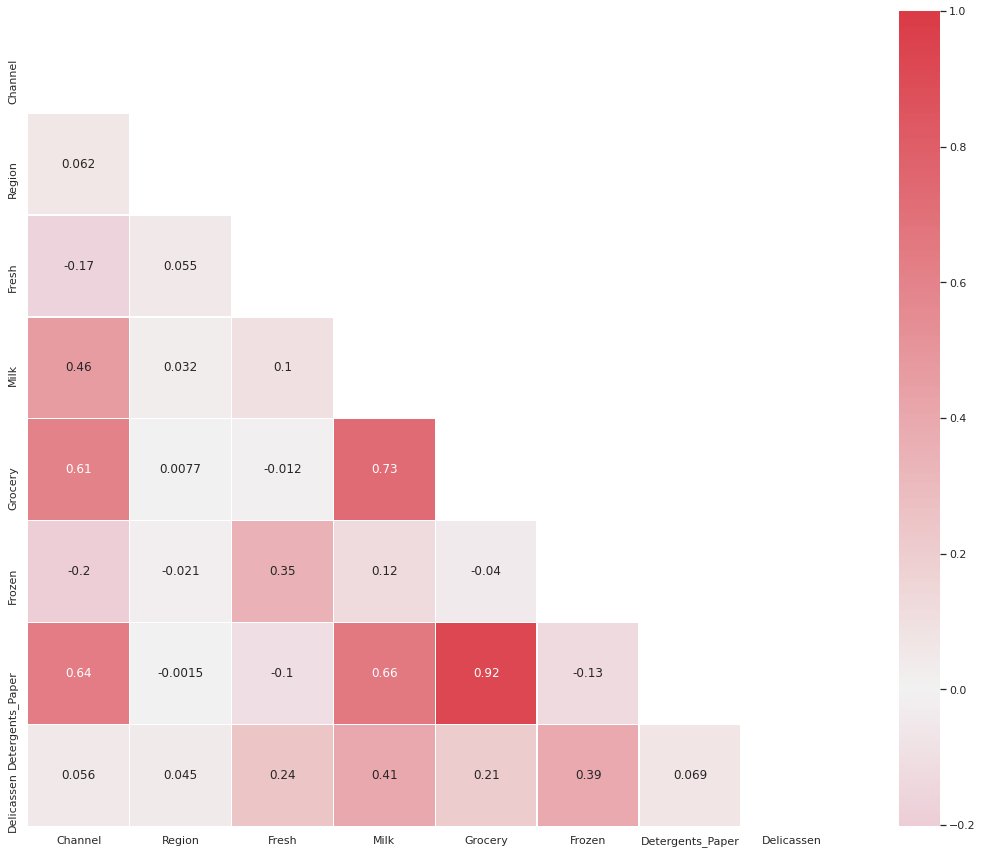

In [8]:
sns.set(style='white')   # estilo blanco


mascara=np.triu(np.ones_like(corr, dtype=bool))  # genera una mascara para la triangular superior

color_map=sns.diverging_palette(0, 10, as_cmap=True)  # paleta de colores
plt.figure(figsize=(20,15))

sns.heatmap(corr, annot = True,
           mask=mascara,
           cmap=color_map,
           vmax=1,  # limite vertical
           center=0, 
           square=True,  # datos como cuadrados
           linewidth=.5, # ancho de linea
           cbar_kws={'shrink': 1}  # barra lateral
           );

In [9]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


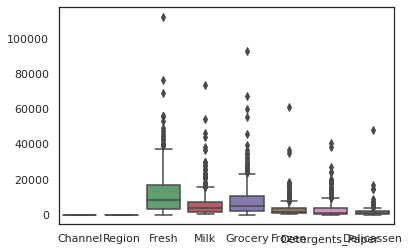

In [10]:
sns.boxplot(data=df);

In [11]:
# Your observations here
#Existen  outliers. También había una fuerte correlacion en la columna Grocery con Milk y detergent_paper.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [12]:
# Your code here
df_clean = df.copy()

outliers=pd.DataFrame(columns=df_clean.columns)

outliers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


In [13]:
df_clean.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [14]:
stats=df_clean.describe().T

stats['IQR']=stats['75%']-stats['25%']

stats.tail()

,count,mean,std,min,25%,50%,75%,max,IQR
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,5657.25
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,8502.75
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,2812.00
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3665.25
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1412.00


In [15]:
for e in stats.index:
    
    iqr=stats.at[e, 'IQR']
    
    cutoff=1.5 * iqr
    
    lower=stats.at[e, '25%']-cutoff
    upper=stats.at[e, '75%']+cutoff
    
    res=df_clean[(df_clean[e]<lower) | (df_clean[e]>upper)].copy()
    
    res['outliers']=e
    outliers=outliers.append(res, sort=True)  # append de pandas no de listas
    
outliers['outliers'].value_counts()

Frozen              43
Detergents_Paper    30
Milk                28
Delicassen          27
Grocery             24
Fresh               20
Name: outliers, dtype: int64

In [16]:
clean_index=[i for i in df_clean.index if i not in outliers.index]

In [17]:
df_clean =df_clean.iloc[clean_index]

In [18]:
df_clean.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545


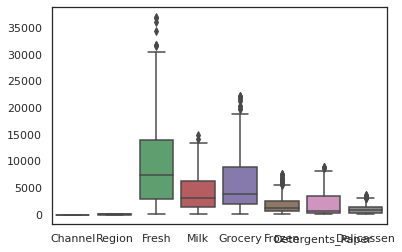

In [19]:
sns.boxplot(data=df_clean);

In [20]:
cte_cols=[]

for c in df_clean.select_dtypes(include=np.number):  # para cada columna en las columnas numéricas
    if df_clean[c].std()==0:
        cte_cols.append(c)
        
cte_cols

[]

In [21]:
colineales=[]                   # con esto observo las columnas colineales, columnas a eliminar

for c in df_clean._get_numeric_data():
    
    for i in range(len(df.corr())):
        
        if abs(df_clean.corr()[c][i])>0.9 and abs(df_clean.corr()[c][i])<1:
            
            colineales.append(c)

colineales=list(set(colineales))   

len(colineales)

0

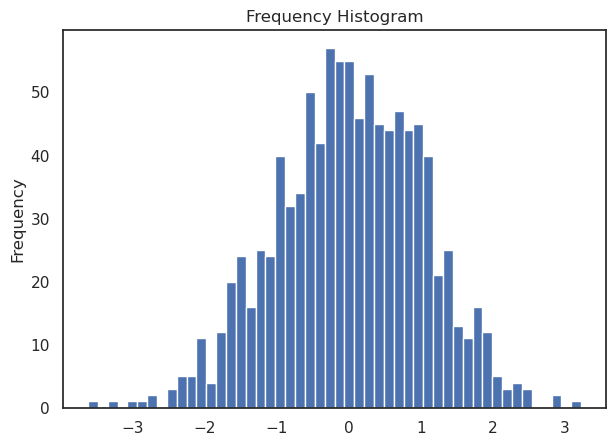

In [22]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
# Plot Histogram on x
x = np.random.normal(size = 1000)
plt.hist(x, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [23]:
# Your comment here
# Pues he decido quitar los outliers del Df. No he eliminado ninguna columna por su correlación


Challenge 3 - Data Preprocessing
One problem with the dataset is the value ranges are remarkably different across various categories (e.g. Fresh and Grocery compared to Detergents_Paper and Delicassen). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into feature scaling. Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

We will use the StandardScaler from sklearn.preprocessing and scale our data. Read more about StandardScaler here.
After scaling your data, assign the transformed data to a new variable customers_scale.

In [24]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
cs= pd.DataFrame(StandardScaler().fit_transform(df_clean), columns=df_clean.columns)

cs.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.579474,0.590092,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465
1,1.579474,0.590092,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591
2,-0.633122,0.590092,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169
3,1.579474,0.590092,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749
4,1.579474,0.590092,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [25]:
cols=[c for c in df_clean.columns if c not in ['Channel', 'Region']]

In [26]:
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
clusters=kmeans.fit(cs[cols])

In [27]:
df_clean['labels']=clusters.labels_

df_clean.labels.count()

332

In [28]:
df_clean.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
3,1,3,13265,1196,4221,6404,507,1788,3
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,1


In [29]:
print(df_clean['labels'].value_counts())

1    142
2     77
3     72
0     41
Name: labels, dtype: int64


Count the values in `labels`.

In [30]:
len(clusters.cluster_centers_)

4

In [31]:
preds=clusters.fit_predict(cs[cols])

preds[10:50]

array([3, 2, 3, 1, 2, 3, 1, 3, 0, 1, 0, 1, 3, 1, 1, 0, 1, 2, 2, 3, 2, 2,
       2, 2, 0, 1, 2, 0, 1, 2, 1, 3, 1, 0, 2, 0, 1, 2, 0, 1], dtype=int32)

In [32]:
distancias=clusters.fit_transform(cs[cols])

len(distancias)

332

In [33]:
distancias[0]

array([1.98823352, 2.6873597 , 2.29737595, 3.5618503 ])

In [34]:
cs.shape

(332, 8)

In [35]:
cs['labels']=preds

cs.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,1.579474,0.590092,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465,3
1,1.579474,0.590092,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591,2
2,-0.633122,0.590092,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169,0
3,1.579474,0.590092,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749,3
4,1.579474,0.590092,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949,1


In [36]:
df_clean[df_clean.labels==0].head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
12,2,3,31714,12319,11757,287,3881,2931,0
14,2,3,24653,9465,12091,294,5058,2168,0
18,2,3,18601,6327,10099,2205,2767,3181,0
20,2,3,17546,4519,4602,1066,2259,2124,0
30,1,3,18815,3610,11107,1148,2134,2963,0


In [37]:
df_clean[df_clean.labels==1].head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,1
8,1,3,5963,3648,6192,425,1716,750,1
11,2,3,13146,1124,4523,1420,549,497,1
15,1,3,10253,1114,3821,397,964,412,1


In [38]:
df_clean[df_clean.labels==2].head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
7,2,3,7579,4956,9426,1669,3321,2566,2
9,2,3,6006,11093,18881,1159,7425,2098,2
10,2,3,3366,5403,12974,4400,5977,1744,2


In [39]:
df_clean[df_clean.labels==3].head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
3,1,3,13265,1196,4221,6404,507,1788,3
21,1,3,5567,871,2010,3383,375,569,3
26,1,3,9898,961,2861,3151,242,833,3
33,1,3,29729,4786,7326,6130,361,1083,3
50,1,3,6269,1095,1980,3860,609,2162,3


# Challenge 4 - Data Clustering with AgglomerativeClustering

Now let's cluster the data using AgglomerativeClustering. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_AC']`. Now your original data have two labels, one from K-Means and the other from AgglomerativeClustering.

In [40]:
# Your code here
from sklearn.cluster import AgglomerativeClustering as AC

In [41]:
cluster=AC().fit(cs[cols])

In [42]:
df_clean['labels_AC']=cluster.labels_

In [43]:
df_clean.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_AC
0,2,3,12669,9656,7561,214,2674,1338,2,0
1,2,3,7057,9810,9568,1762,3293,1776,2,0
3,1,3,13265,1196,4221,6404,507,1788,3,1
5,2,3,9413,8259,5126,666,1795,1451,1,0
6,2,3,12126,3199,6975,480,3140,545,1,0


Count the values in `labels_AC`.

In [44]:
# Your code here
df_clean.labels_AC.count()

332

# Challenge 5 - Compare K-Means with AgglomerativeClustering

Now we want to visually compare how K-Means and AgglomerativeClustering have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_AC`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_AC` respectively


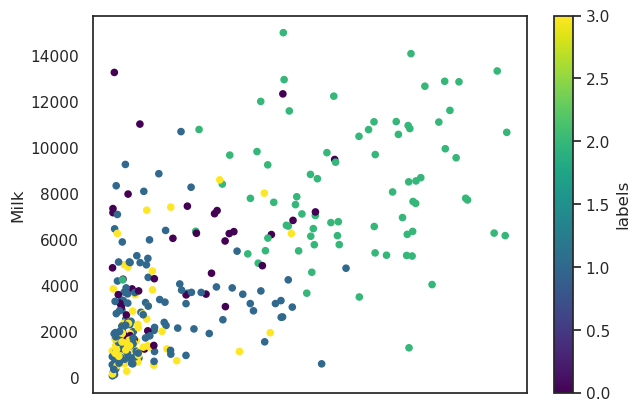

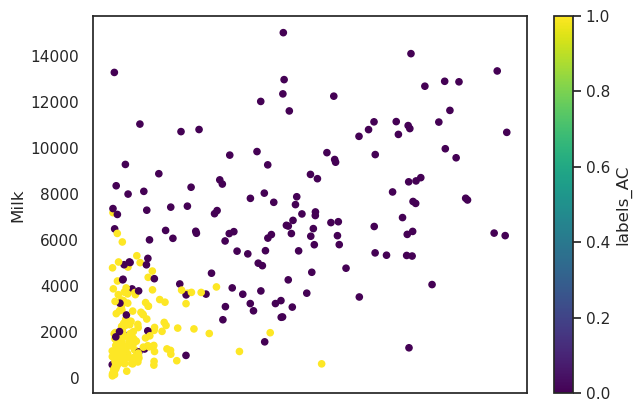

In [45]:
# Your code here:
df_clean.plot.scatter(x= 'Detergents_Paper', y = 'Milk', c= 'labels', colormap = 'viridis');
df_clean.plot.scatter(x= 'Detergents_Paper', y = 'Milk', c= 'labels_AC', colormap = 'viridis');

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_AC` respectively

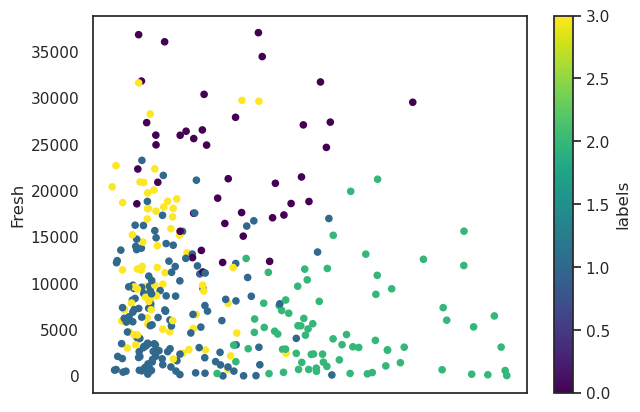

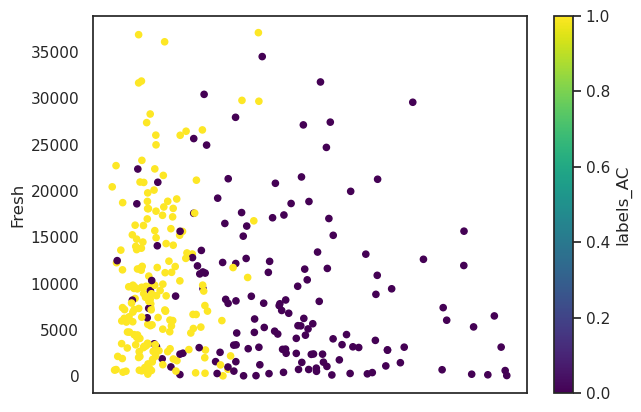

In [46]:
# Your code here:
df_clean.plot.scatter(x= 'Grocery', y = 'Fresh', c= 'labels', colormap = 'viridis');
df_clean.plot.scatter(x= 'Grocery', y = 'Fresh', c= 'labels_AC', colormap = 'viridis');

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_AC` respectively

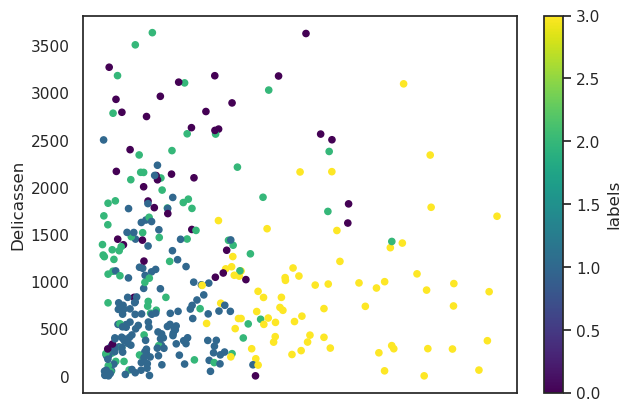

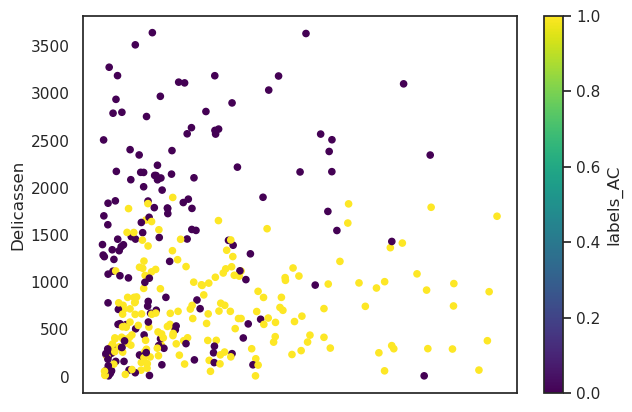

In [47]:
# Your code here:
df_clean.plot.scatter(x= 'Frozen', y = 'Delicassen', c= 'labels', colormap = 'viridis');
df_clean.plot.scatter(x= 'Frozen', y = 'Delicassen', c= 'labels_AC', colormap = 'viridis');

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_AC` respectively and compute the means for all columns.

In [48]:
df_clean['sum'] = df_clean.Fresh + df_clean.Milk + df_clean.Grocery + df_clean.Frozen + df_clean.Detergents_Paper + df_clean.Delicassen

In [49]:
df_clean.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_AC,sum
0,2,3,12669,9656,7561,214,2674,1338,2,0,34112
1,2,3,7057,9810,9568,1762,3293,1776,2,0,33266
3,1,3,13265,1196,4221,6404,507,1788,3,1,27381
5,2,3,9413,8259,5126,666,1795,1451,1,0,26710
6,2,3,12126,3199,6975,480,3140,545,1,0,26465


In [50]:
# Your code here:


df_clean.drop(columns = ['Channel','Region','labels_AC']).groupby('labels').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,sum
labels,,,,,,,
0,23003.951220,5095.390244,6485.219512,1739.707317,1452.292683,2030.390244,39806.951220
1,6872.197183,2571.584507,3363.929577,1000.633803,878.091549,628.133803,15314.570423
2,5251.818182,8220.272727,12957.597403,1247.168831,5475.727273,1350.181818,34502.766234
3,11754.611111,2165.041667,2908.291667,4292.805556,618.277778,848.708333,22587.736111


In [51]:
 df_clean.drop(columns = ['Channel','Region','labels']).groupby('labels_AC').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,sum
labels_AC,,,,,,,
0,8729.046667,6783.493333,9818.206667,1405.660000,3720.973333,1400.400000,31857.780000
1,10221.862637,1897.780220,2626.225275,2240.016484,506.780220,700.285714,18192.950549


Which algorithm appears to perform better?

In [57]:
# Your observations here
# Parece que labels_AC agrupa mejor en todos los sentidos. Parece que los clusters separan a un cliente que consume más productos premium y otro que consume productos mmás standard

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with AgglomerativeClustering because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [53]:
# Your code here

kmeans_3 = KMeans(n_clusters = 3)
kmeans_5 = KMeans(n_clusters = 5)
kmeans_7 = KMeans(n_clusters = 7)
kmeans_3.fit(cs[cols])
df_clean['labels_3'] = kmeans_3.labels_
kmeans_5.fit(cs[cols])
df_clean['labels_5'] = kmeans_5.labels_
kmeans_7.fit(cs[cols])
df_clean['labels_7'] = kmeans_7.labels_
df_clean.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_AC,sum,labels_3,labels_5,labels_7
0,2,3,12669,9656,7561,214,2674,1338,2,0,34112,0,4,5
1,2,3,7057,9810,9568,1762,3293,1776,2,0,33266,0,4,0
3,1,3,13265,1196,4221,6404,507,1788,3,1,27381,2,2,6
5,2,3,9413,8259,5126,666,1795,1451,1,0,26710,0,4,5
6,2,3,12126,3199,6975,480,3140,545,1,0,26465,1,0,5


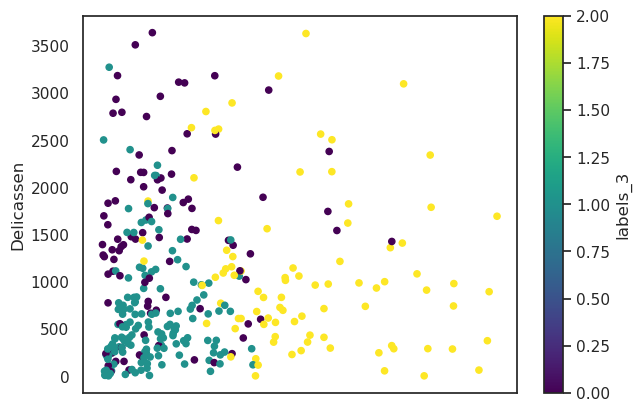

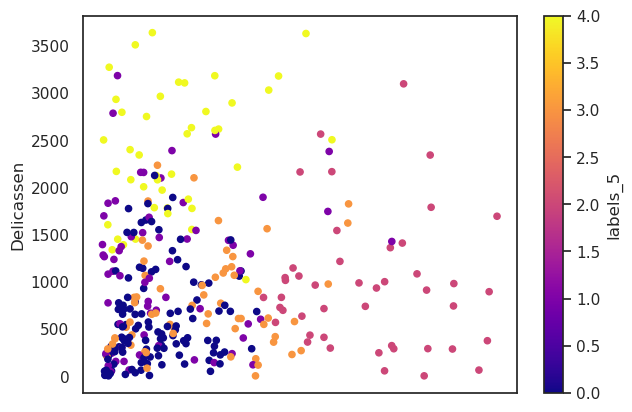

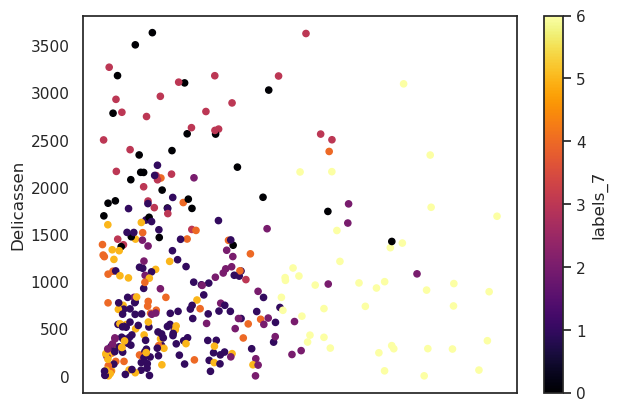

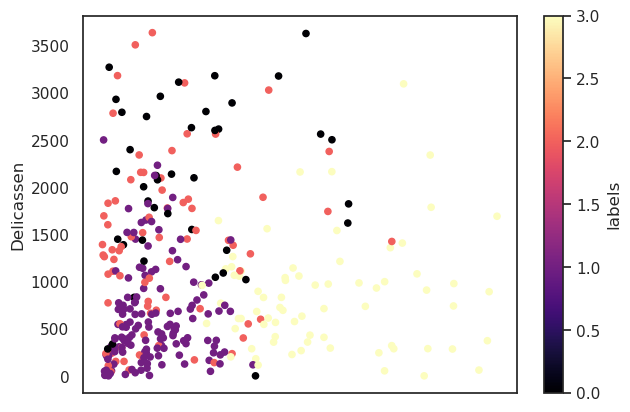

In [60]:
df_clean.plot.scatter(x= 'Frozen', y = 'Delicassen', c= 'labels_3', colormap = 'viridis');
df_clean.plot.scatter(x= 'Frozen', y = 'Delicassen', c= 'labels_5', colormap = 'plasma');
df_clean.plot.scatter(x= 'Frozen', y = 'Delicassen', c= 'labels_7', colormap = 'inferno');
df_clean.plot.scatter(x= 'Frozen', y = 'Delicassen', c= 'labels', colormap = 'magma');

In [61]:
# Your comment here
#labels_3 parece que es el que mejor clasifica, aunque sinceramente, no veo mucho la diferencia

# Bonus Challenge 3 - Changing AgglomerativeClustering linkage criteria

Experiment changing the linkage param in AgglomerativeClustering.

In [66]:
# Your code here
cluster1=AC(linkage='single').fit(cs[cols])  
cluster2=AC(linkage='complete').fit(cs[cols]) 
cluster3=AC(linkage='average').fit(cs[cols]) 

df_clean['labels_AC1']=cluster1.labels_
df_clean['labels_AC2']=cluster2.labels_
df_clean['labels_AC3']=cluster3.labels_

In [68]:
df_clean.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_AC,sum,labels_3,labels_5,labels_7,labels_AC1,labels_AC2,labels_AC3
0,2,3,12669,9656,7561,214,2674,1338,2,0,34112,0,4,5,0,0,1
1,2,3,7057,9810,9568,1762,3293,1776,2,0,33266,0,4,0,0,0,0
3,1,3,13265,1196,4221,6404,507,1788,3,1,27381,2,2,6,0,0,1
5,2,3,9413,8259,5126,666,1795,1451,1,0,26710,0,4,5,0,0,1
6,2,3,12126,3199,6975,480,3140,545,1,0,26465,1,0,5,0,0,1


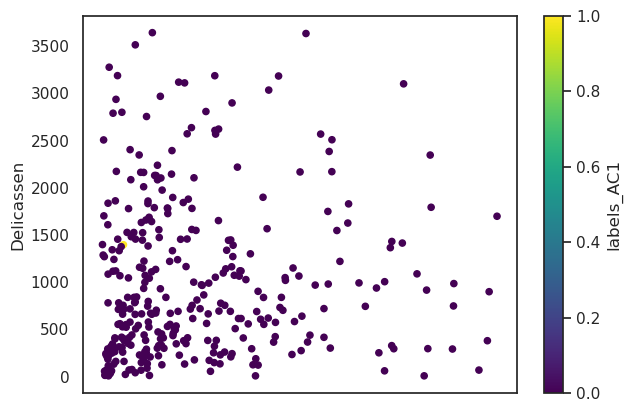

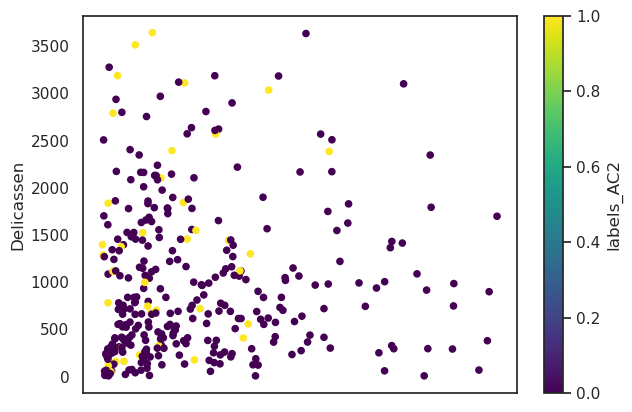

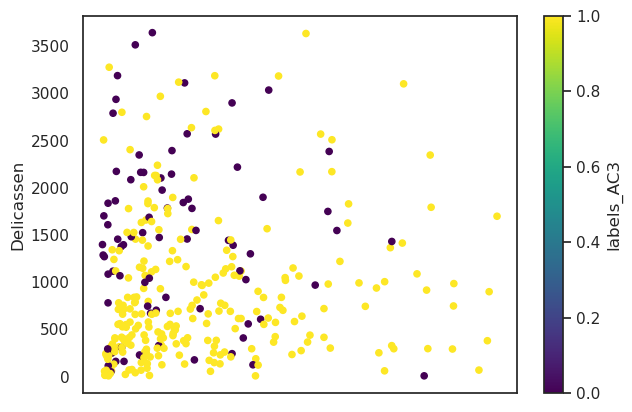

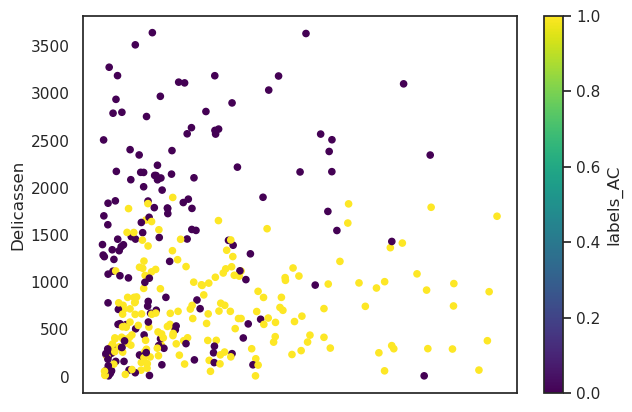

In [70]:
df_clean.plot.scatter(x= 'Frozen', y = 'Delicassen', c= 'labels_AC1', colormap = 'viridis');
df_clean.plot.scatter(x= 'Frozen', y = 'Delicassen', c= 'labels_AC2', colormap = 'viridis');
df_clean.plot.scatter(x= 'Frozen', y = 'Delicassen', c= 'labels_AC3', colormap = 'viridis');
df_clean.plot.scatter(x= 'Frozen', y = 'Delicassen', c= 'labels_AC', colormap = 'viridis');

In [56]:
# Your comment here
# ESTOY en las mismas de antes, El primero si que es evidentemente peor, aunque labels_AC3 parece que da unos resultados mejores.